# Curve Decomposition

In [1]:
from molass import get_version
assert get_version() >= '0.5.2', "This tutorial requires molass version 0.5.2 or higher."
from molass_data import get_version
assert get_version() >= '0.3.0', "This tutorial requires molass_data version 0.3.0 or higher."
from molass_data import SAMPLE4
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE4)
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()

[0.71855534 0.10826109 0.17318356]
[0.49999669 0.33334145 0.16666185]


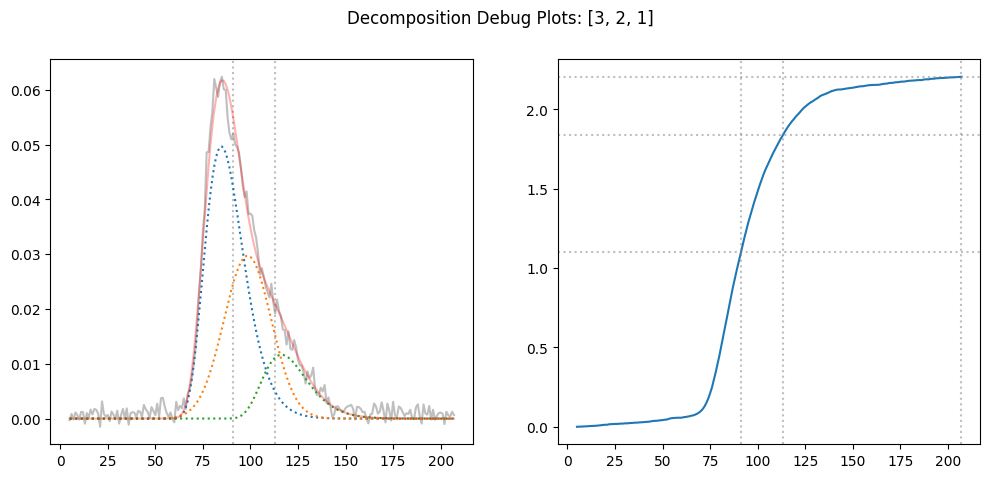

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from molass.Decompose.Proportional import decompose_proportionally
icurve  = corrected_ssd.xr.get_icurve()
x, y = icurve.get_xy()
result = decompose_proportionally(x, y, [3,2,1], debug=True)


In [3]:
result

       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: -4.262727985617209
             x: [ 5.122e-02  8.156e+01  7.883e+00  5.251e+00  2.585e-02
                  9.890e+01  1.083e+01 -6.481e-03  1.128e-02  1.204e+02
                  1.206e+01  6.805e+00]
           nit: 1627
          nfev: 2400
 final_simplex: (array([[ 5.122e-02,  8.156e+01, ...,  1.206e+01,
                         6.805e+00],
                       [ 5.122e-02,  8.156e+01, ...,  1.206e+01,
                         6.805e+00],
                       ...,
                       [ 5.122e-02,  8.156e+01, ...,  1.206e+01,
                         6.805e+00],
                       [ 5.122e-02,  8.156e+01, ...,  1.206e+01,
                         6.805e+00]]), array([-4.263e+00, -4.263e+00, ..., -4.263e+00, -4.263e+00]))

In [4]:
len(x)

203

In [5]:
rgcurve = corrected_ssd.xr.compute_rgcurve()

100%|██████████| 203/203 [00:44<00:00,  4.55it/s]


In [6]:
num_trails = 8
species1_proportions = np.ones(num_trails) * 3
species2_proportions = np.linspace(1, 3, num_trails)
proportions = np.array([species1_proportions, species2_proportions]).T
proportions

array([[3.        , 1.        ],
       [3.        , 1.28571429],
       [3.        , 1.57142857],
       [3.        , 1.85714286],
       [3.        , 2.14285714],
       [3.        , 2.42857143],
       [3.        , 2.71428571],
       [3.        , 3.        ]])

D:\Github\molass-library\molass\Decompose\VaryUtils.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


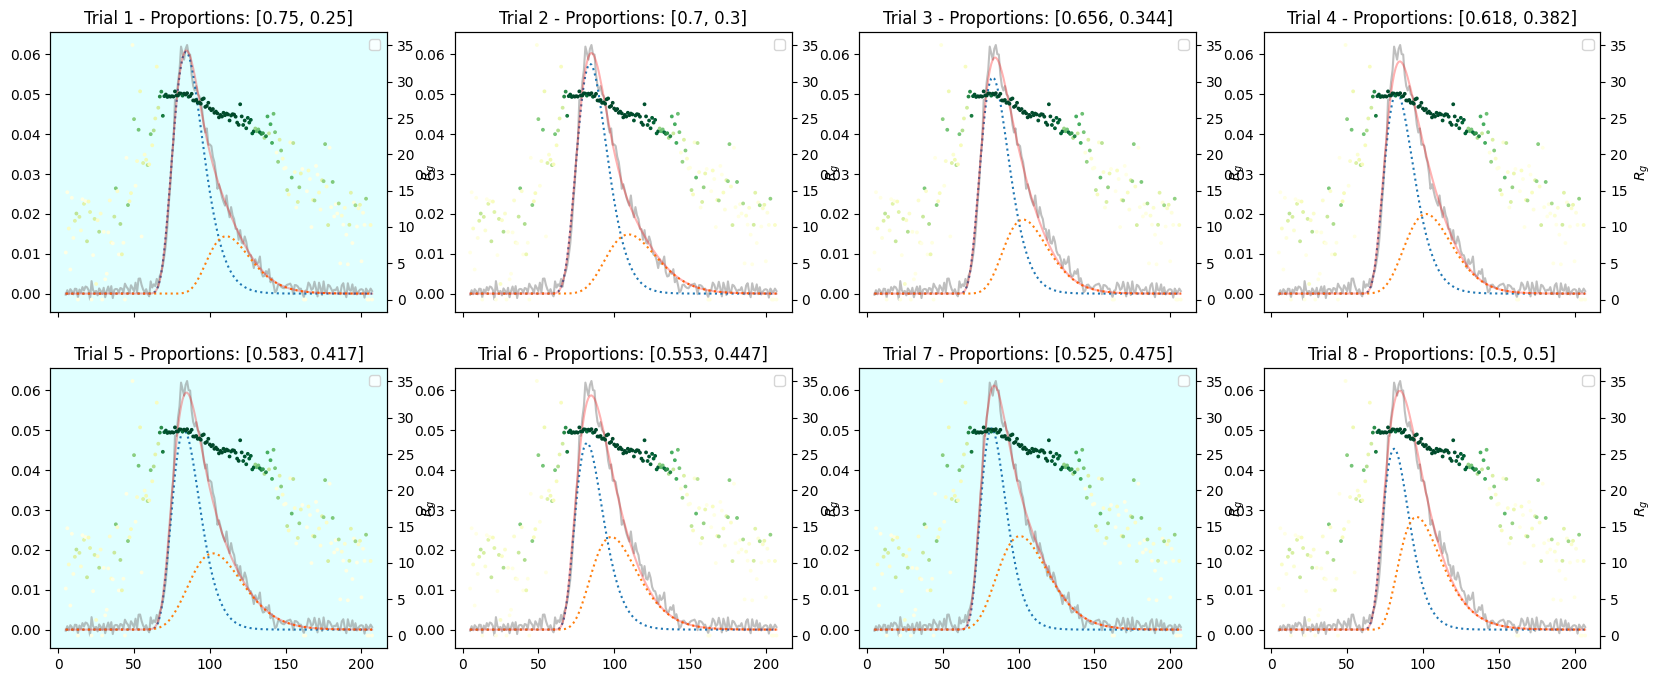

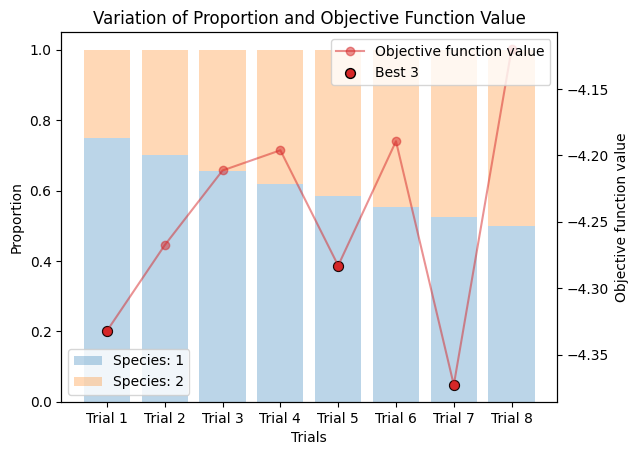

In [7]:
from importlib import reload
import molass.Decompose.VaryUtils
reload(molass.Decompose.VaryUtils)
from molass.Decompose.VaryUtils import plot_varied_decompositions
plot_varied_decompositions(x, y, proportions, rgcurve=rgcurve, best=3)

In [8]:
species3_proportions = np.ones(num_trails) * 1
proportions = np.array([species1_proportions, species2_proportions, species3_proportions]).T
proportions


array([[3.        , 1.        , 1.        ],
       [3.        , 1.28571429, 1.        ],
       [3.        , 1.57142857, 1.        ],
       [3.        , 1.85714286, 1.        ],
       [3.        , 2.14285714, 1.        ],
       [3.        , 2.42857143, 1.        ],
       [3.        , 2.71428571, 1.        ],
       [3.        , 3.        , 1.        ]])

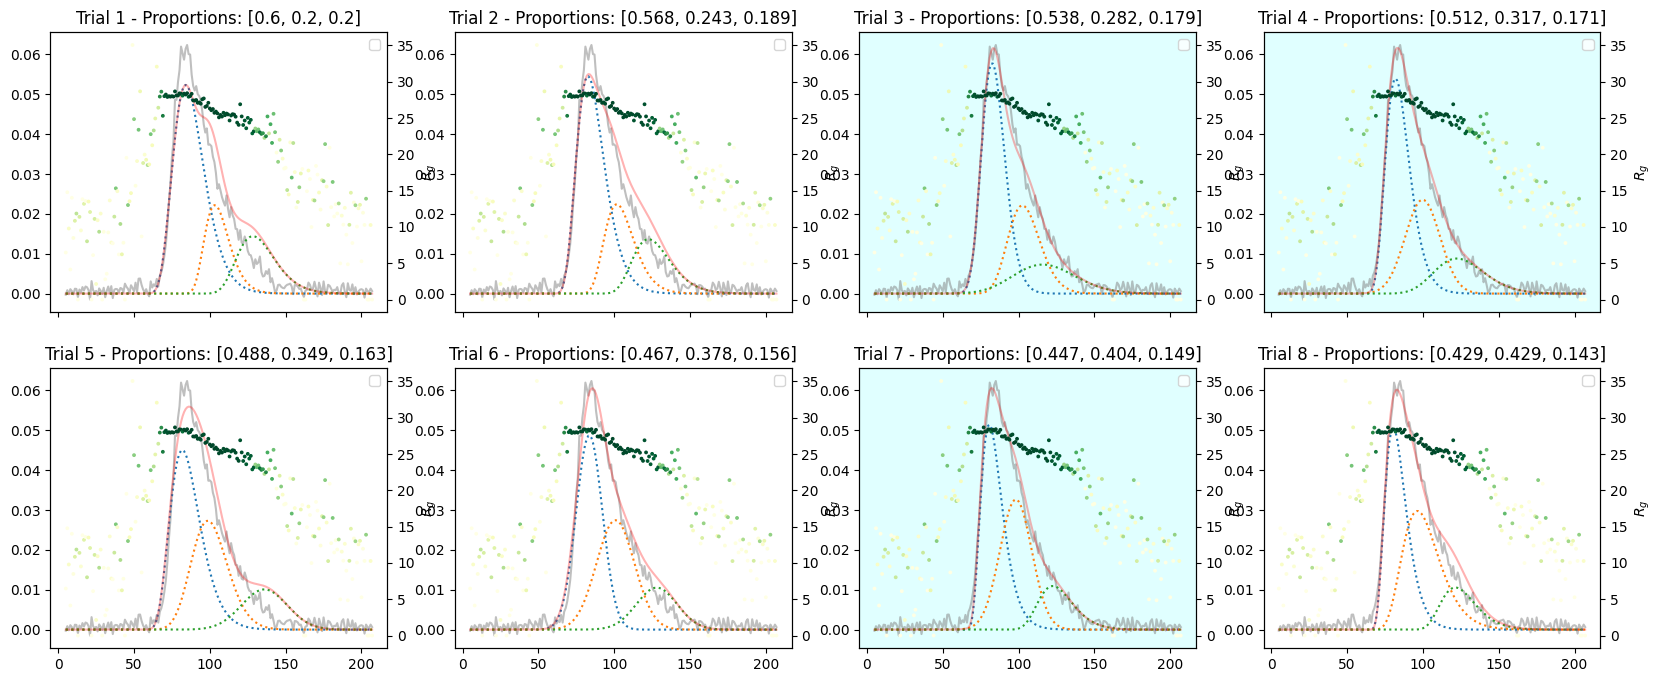

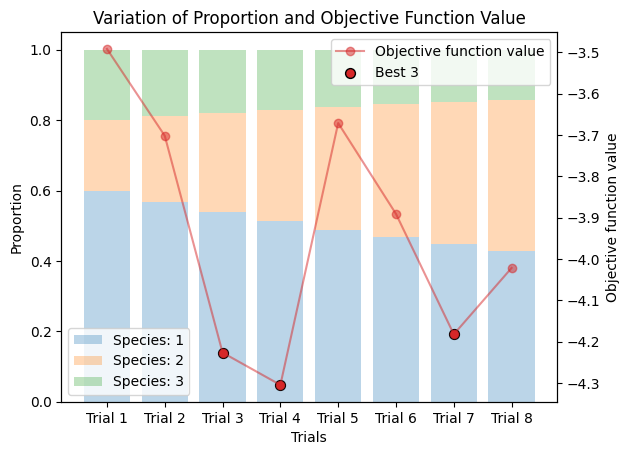

In [9]:
plot_varied_decompositions(x, y, proportions, rgcurve=rgcurve, best=3)

In [10]:
from molass_data import SAMPLE1
ssd = SSD(SAMPLE1)
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()

zeros at the angular ends of error data have been replaced with the adjacent values.


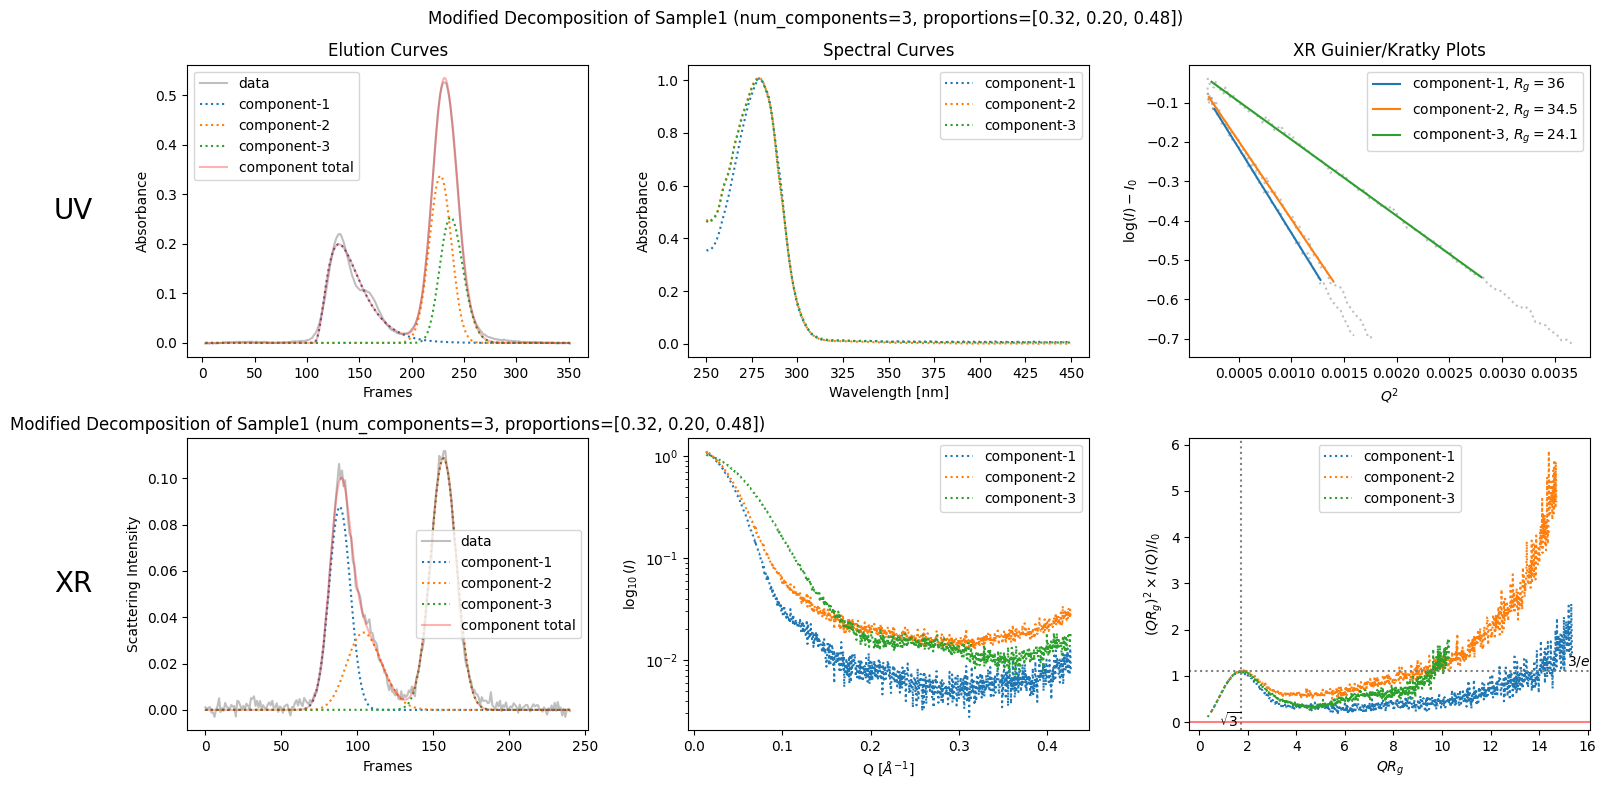

In [11]:
modified_decomposition = corrected_ssd.quick_decomposition(num_components=3, proportions=[0.32, 0.20, 0.48])
plot2 = modified_decomposition.plot_components(title="Modified Decomposition of Sample1 (num_components=3, proportions=[0.32, 0.20, 0.48])")